In [1]:
from tensorflow.keras.datasets import mnist
 
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

2023-05-23 16:31:31.806408: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


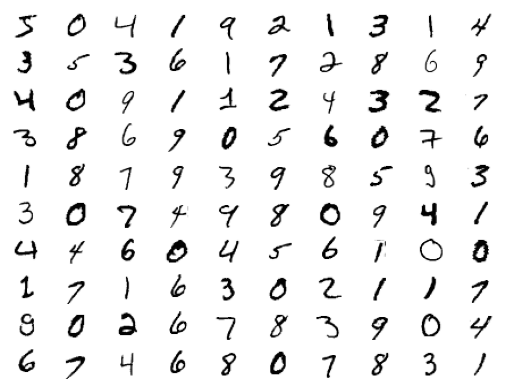

In [2]:
from matplotlib import pyplot as plt

for i in range(100):
    plt.subplot(10,10, i+1)
    plt.imshow(xtrain[i], cmap=plt.cm.Greys) #here can be slicing
    plt.axis('off')

In [3]:
xtrain.shape

(60000, 28, 28)

In [4]:
ytrain.shape

(60000,)

In [5]:
#ytrain = ytrain.reshape(60000, 9)

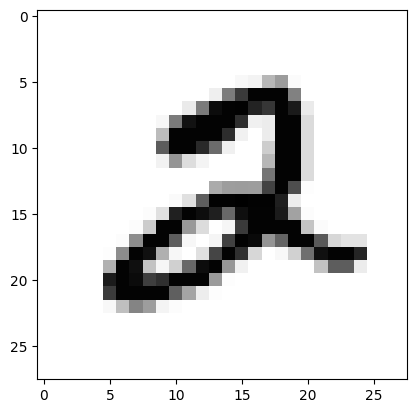

In [6]:
plt.imshow(xtrain[5,:, :], cmap=plt.cm.Greys) #here can be slicing


In [7]:
type(ytest)

numpy.ndarray

In [8]:
ytrain.shape

(60000,)

In [9]:
ytrain[5]

2

In [10]:
from keras.utils import to_categorical

In [11]:
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

In [12]:
from keras import models
from keras import layers

In [13]:
 model = models.Sequential()

2023-05-23 16:31:36.972641: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


we are gonna have 2 dense layers which are densly connected 

In [14]:
xtrain[0].shape

(28, 28)

### Configure the model

In [15]:
28*28

784

In [16]:
#fist layer 
model.add(layers.Dense(units = 512, activation = 'relu', input_shape=(28*28, )))

In [17]:
#second layer - represents digit classes 0 to 9
model.add(layers.Dense(units = 10, activation = 'softmax')) # no shape here as it is second dense

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### Compile the model

In [19]:
model.compile(optimizer = 'rmsprop', 
             loss = 'categorical_crossentropy', 
             metrics = ['accuracy'])

### Train the model

In [20]:
xtrain = xtrain.reshape(60000,784)

In [31]:
fit_mod = model.fit(xtrain, ytrain, epochs= 5, batch_size = 128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2589 - accuracy: 0.9796
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2425 - accuracy: 0.9822
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2331 - accuracy: 0.9837
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2147 - accuracy: 0.9858
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1845 - accuracy: 0.9866


In [28]:
test_loss, test_acc = model.evaluate(xtrain, ytrain)
print('test loss ', '\ntest acc ', test_acc)

1875/1875 [==============================] - 2s 1ms/step - loss: 0.2908 - accuracy: 0.9783
test loss  
test acc  0.9783499836921692


### Try with input = xtrain.shape[0]

In [22]:
model1 = models.Sequential()

In [24]:
model1.add(layers.Dense(units = 512, activation = 'relu', input_shape=xtrain[0].shape))

In [25]:
model1.add(layers.Dense(units = 10, activation = 'softmax')) # no shape here as it is second dense

In [26]:
model1.compile(optimizer = 'rmsprop', 
             loss = 'categorical_crossentropy', 
             metrics = ['accuracy'])

In [27]:
model1.fit(xtrain, ytrain, epochs= 5, batch_size = 128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 5.4451 - accuracy: 0.9006
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.7069 - accuracy: 0.9530
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.4720 - accuracy: 0.9657
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.3789 - accuracy: 0.9719
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.3330 - accuracy: 0.9766


In [29]:
test_loss1, test_acc1 = model1.evaluate(xtrain, ytrain)
print('test loss ', '\ntest acc ', test_acc1)

1875/1875 [==============================] - 2s 1ms/step - loss: 0.2352 - accuracy: 0.9822
test loss  
test acc  0.9821500182151794


In [32]:
fit_mod.history.keys()

dict_keys(['loss', 'accuracy'])

In [34]:
import pandas as pd

<Axes: >

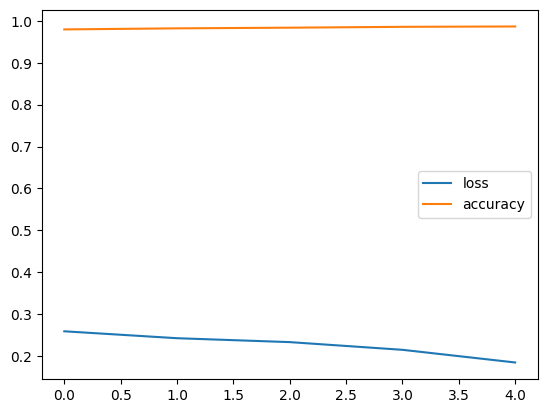

In [35]:
pd.DataFrame(fit_mod.history).plot()